
# Installation and Loading of the Dataframe

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir(path=os.getcwd())

['.config', 'sample_data']

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install transformers

# **Big Query Import**

In [ ]:
df=pd.read_gbq("SELECT * FROM `transform.sentiment_analysis`", project_id="project-impact-lense")

df

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,EN_translations_ad_creative_bodies
0,FDP,FDP Fraktion Bundestag,2019-01-24,Was wir mit Eurer Stimme von der Bundestagswah...,What do we do with your voice of the Bundestag...
1,FDP,FDP Fraktion Bundestag,2019-10-07,Morgen ist Weltlehrertag. Wir finden: Lehrer l...,Tomorrow is world teacher day. We think: teach...
2,SPD,SPD-Fraktion im Bundestag,2019-10-07,"""Die Wahl einer Frau [...] für dieses Amt hat ...","""The choice of a woman [...] for this office u..."
3,FDP,FDP Fraktion Bundestag,2019-10-07,Die Volksrepublik China erhält von Deutschland...,The People's Republic of China still receives ...
4,CDU_CSU,CSU (Christlich-Soziale Union),2019-10-07,Grünen-Chef Robert Habeck bringt erneut eine E...,Green boss Robert Habeck once again brings up ...
...,...,...,...,...,...
57061,SPD,SPD-Fraktion im Bundestag,2022-07-26,Die steigenden Kosten sind für viele unter uns...,"For many of us, the rising costs are already a..."
57062,SPD,SPD-Fraktion im Bundestag,2022-07-26,n,n
57063,SPD,SPD-Fraktion im Bundestag,2022-07-26,n,n
57064,FDP,FDP Fraktion Bundestag,2022-07-26,In manchen Bereichen fehlt es aktuell an Perso...,"In some areas, staff is currently missing. Why..."


# Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57066 entries, 0 to 57065
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   parties                             57066 non-null  object
 1   page_name                           57066 non-null  object
 2   ad_delivery_start_time              57066 non-null  dbdate
 3   ad_creative_bodies                  57066 non-null  object
 4   EN_translations_ad_creative_bodies  57066 non-null  object
dtypes: dbdate(1), object(4)
memory usage: 2.2+ MB


In [ ]:
#change date column format

df['ad_delivery_start_time'] = pd.to_datetime(df['ad_delivery_start_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57066 entries, 0 to 57065
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   parties                             57066 non-null  object        
 1   page_name                           57066 non-null  object        
 2   ad_delivery_start_time              57066 non-null  datetime64[ns]
 3   ad_creative_bodies                  57066 non-null  object        
 4   EN_translations_ad_creative_bodies  57066 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.2+ MB


In [ ]:
# rename the translated column

df = df.rename(columns={'EN_translations_ad_creative_bodies':'translated_posts'})
df.head

<bound method NDFrame.head of        parties                       page_name ad_delivery_start_time  \
0          FDP          FDP Fraktion Bundestag             2019-01-24   
1          FDP          FDP Fraktion Bundestag             2019-10-07   
2          SPD       SPD-Fraktion im Bundestag             2019-10-07   
3          FDP          FDP Fraktion Bundestag             2019-10-07   
4      CDU_CSU  CSU (Christlich-Soziale Union)             2019-10-07   
...        ...                             ...                    ...   
57061      SPD       SPD-Fraktion im Bundestag             2022-07-26   
57062      SPD       SPD-Fraktion im Bundestag             2022-07-26   
57063      SPD       SPD-Fraktion im Bundestag             2022-07-26   
57064      FDP          FDP Fraktion Bundestag             2022-07-26   
57065      FDP                             FDP             2022-07-26   

                                      ad_creative_bodies  \
0      Was wir mit Eurer Stimme v

# **Filter on number of characters**

In [ ]:
# Let's define the mimimum number of characters in ads
minimum_size_characters = 20

# How many ads have less than this minimum number of characters?
f"Number of ads with less than {minimum_size_characters} characters: {(df['ad_creative_bodies'].apply(len) < minimum_size_characters).sum()}"

'Number of ads with less than 20 characters: 2389'

In [ ]:
# Define the maximum number of characters in an ad
max_size_characters = 1500

# How many ads have more than this maximum number of characters?
f"Number of ads with more than {max_size_characters} characters: {(df['ad_creative_bodies'].apply(len) > max_size_characters).sum()}"

'Number of ads with more than 1500 characters: 696'

In [ ]:
# We want to filter only the ads containing at least 20 characters and those below 1500 = majority of ads and we get rid of outliers

filter_char = (df['ad_creative_bodies'].apply(len) >= minimum_size_characters) & (df['ad_creative_bodies'].apply(len) <= max_size_characters)

# apply to entire dataframe
df_char = df[filter_char]
df_char.shape

(53981, 5)

#Full dataframe

In [ ]:
df = df_char

df

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
0,FDP,FDP Fraktion Bundestag,2019-01-24,Was wir mit Eurer Stimme von der Bundestagswah...,What do we do with your voice of the Bundestag...
1,FDP,FDP Fraktion Bundestag,2019-10-07,Morgen ist Weltlehrertag. Wir finden: Lehrer l...,Tomorrow is world teacher day. We think: teach...
2,SPD,SPD-Fraktion im Bundestag,2019-10-07,"""Die Wahl einer Frau [...] für dieses Amt hat ...","""The choice of a woman [...] for this office u..."
3,FDP,FDP Fraktion Bundestag,2019-10-07,Die Volksrepublik China erhält von Deutschland...,The People's Republic of China still receives ...
4,CDU_CSU,CSU (Christlich-Soziale Union),2019-10-07,Grünen-Chef Robert Habeck bringt erneut eine E...,Green boss Robert Habeck once again brings up ...
...,...,...,...,...,...
57058,FDP,FDP Fraktion Bundestag,2021-03-01,Wir waren heute #Live auf @tiktok! \n@nikothec...,Today we were #live on @tektok!\n@nikothecap a...
57059,SPD,SPD-Fraktion im Bundestag,2021-11-12,"""Wir müssen unser Land winterfest machen"", wir...","""We have to make our country winter -proof"", @..."
57060,FDP,FDP Fraktion Bundestag,2021-11-12,Wir müssen den Impffortschritt beschleunigen. ...,We have to accelerate the vaccination progress...
57064,FDP,FDP Fraktion Bundestag,2022-07-26,In manchen Bereichen fehlt es aktuell an Perso...,"In some areas, staff is currently missing. Why..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53981 entries, 0 to 57065
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   parties                 53981 non-null  object        
 1   page_name               53981 non-null  object        
 2   ad_delivery_start_time  53981 non-null  datetime64[ns]
 3   ad_creative_bodies      53981 non-null  object        
 4   translated_posts        53981 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.5+ MB


# Cleaning/Preprocessing of the text columns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # Removing whitespaces
    sentence = sentence.strip()
    # Lowercasing
    sentence = sentence.lower()
    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
    # Tokenizing
    tokenized = word_tokenize(sentence)
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    return cleaned_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_copy = df.copy()

#Clean entire df

In [ ]:
df_copy['translated_posts'] = df_copy['translated_posts'].apply(preprocessing)

# **Filter on the peak months**

In [ ]:
# Specify the year and month you want to filter
desired_year = 2019
desired_month = 5
# Filter the DataFrame based on the specified year and month
df_2019 = df[(df['ad_delivery_start_time'].dt.year == desired_year) & (df['ad_delivery_start_time'].dt.month == desired_month)]

df_2019

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
8301,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
8302,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
8303,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
8304,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
8305,FDP,FDP Fraktion Bundestag,2019-05-01,Wer von euch kann sich noch an „Fricke & Solms...,"Who of you can still remember ""Fricke & Solms""..."
...,...,...,...,...,...
44753,FDP,FDP Fraktion Bundestag,2019-05-29,Bundesjustizministerin @[1522202731410785:274:...,Federal Minister of Justice @[1522202731410785...
44859,SPD,SPD-Fraktion im Bundestag,2019-05-31,Bei der Grundrente geht es um Respekt und Aner...,The basic pension is about respect and recogni...
44860,FDP,FDP Fraktion Bundestag,2019-05-31,Um die Emissionen strikt zu begrenzen und CO2 ...,In order to strictly limit emissions and to gi...
44861,FDP,FDP Fraktion Bundestag,2019-05-31,Eine neue Studie des World Competitive Center ...,A new study by the World Competitive Center sh...


In [ ]:
# Specify the year and month you want to filter
desired_year = 2021
desired_month = 8
# Filter the DataFrame based on the specified year and month
df_2021_aug = df[(df['ad_delivery_start_time'].dt.year == desired_year) & (df['ad_delivery_start_time'].dt.month == desired_month)]

df_2021_aug

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
46280,LINKE,Fraktion DIE LINKE. im Bundestag,2021-08-01,"Live-Talk am Montag, 19:15 Uhr, hier auf Faceb...","Live talk on Monday, 7:15 p.m., here on Facebo..."
46369,CDU_CSU,CDU,2021-08-02,Die CDU arbeitet für eine gute Lebensqualität ...,The CDU works for a good quality of life every...
46370,CDU_CSU,CDU,2021-08-02,Die CDU arbeitet für eine gute Lebensqualität ...,The CDU works for a good quality of life every...
46371,LINKE,Fraktion DIE LINKE. im Bundestag,2021-08-02,Live-Talk zum Thema »Gute Arbeit« mit Dietmar ...,"Live talk on the subject of ""good work"" with D..."
46372,CDU_CSU,CDU,2021-08-02,Die CDU arbeitet für eine gute Lebensqualität ...,The CDU works for a good quality of life every...
...,...,...,...,...,...
49338,SPD,SPD,2021-08-31,30 Milliarden Euro Steuergeschenke für Top-Ver...,30 billion euros in tax gifts for top earners ...
49339,SPD,SPD,2021-08-31,30 Milliarden Euro Steuergeschenke für Top-Ver...,30 billion euros in tax gifts for top earners ...
49340,SPD,SPD,2021-08-31,30 Milliarden Euro Steuergeschenke für Top-Ver...,30 billion euros in tax gifts for top earners ...
49341,SPD,SPD,2021-08-31,30 Milliarden Euro Steuergeschenke für Top-Ver...,30 billion euros in tax gifts for top earners ...


In [ ]:
# Specify the year and month you want to filter
desired_year = 2021
desired_month = 9
# Filter the DataFrame based on the specified year and month
df_2021_sep = df[(df['ad_delivery_start_time'].dt.year == desired_year) & (df['ad_delivery_start_time'].dt.month == desired_month)]

df_2021_sep

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
49367,FDP,FDP,2021-09-01,Die wichtigsten Entscheidungen sind oft die pe...,The most important decisions are often the mos...
49368,FDP,FDP,2021-09-01,Das Leben in Deutschland ist teurer geworden. ...,Life in Germany has become more expensive. The...
49369,FDP,FDP,2021-09-01,Das Leben in Deutschland ist teurer geworden. ...,Life in Germany has become more expensive. The...
49370,AfD,AfD,2021-09-01,Wählen Sie am 26. September die Alternative fü...,Choose the alternative for Germany on Septembe...
49371,AfD,AfD,2021-09-01,Wählen Sie am 26. September die Alternative fü...,Choose the alternative for Germany on Septembe...
...,...,...,...,...,...
54143,SPD,SPD,2021-09-26,Olaf Scholz ist unser Kanzler für Deutschland....,Olaf Scholz is our Chancellor for Germany. Are...
54144,FDP,FDP,2021-09-26,Heute ist es so weit! Du entscheidest mit Dein...,Today is the day! You decide with your voice a...
54223,FDP,FDP,2021-09-28,"Wenn nicht jetzt, wann dann? FDP-Mitglied werd...",If not now then when? Become FDP member. No mo...
54224,SPD,SPD,2021-09-28,Olaf Scholz ist unser Kanzler für Deutschland....,Olaf Scholz is our Chancellor for Germany. Are...


#  Concatenated Dataframe df_sentiment (3 peak months of postings)

In [ ]:
# concatenation of those 3 peak months

df_sentiment = pd.concat([df_2019, df_2021_aug, df_2021_sep], ignore_index=True)

df_sentiment

,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
0,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
1,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
2,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
3,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,You too should get to know Europe 🇪🇺 - regardl...
4,FDP,FDP Fraktion Bundestag,2019-05-01,Wer von euch kann sich noch an „Fricke & Solms...,"Who of you can still remember ""Fricke & Solms""..."
...,...,...,...,...,...
38524,SPD,SPD,2021-09-26,Olaf Scholz ist unser Kanzler für Deutschland....,Olaf Scholz is our Chancellor for Germany. Are...
38525,FDP,FDP,2021-09-26,Heute ist es so weit! Du entscheidest mit Dein...,Today is the day! You decide with your voice a...
38526,FDP,FDP,2021-09-28,"Wenn nicht jetzt, wann dann? FDP-Mitglied werd...",If not now then when? Become FDP member. No mo...
38527,SPD,SPD,2021-09-28,Olaf Scholz ist unser Kanzler für Deutschland....,Olaf Scholz is our Chancellor for Germany. Are...


In [ ]:
df_sentiment['ad_creative_bodies'].nunique()

1728

In [ ]:
df_distinct = df_sentiment.drop_duplicates(subset='ad_creative_bodies')

We need more cleaning in the dataframe.

In [ ]:
type(df_distinct['translated_posts'][0])

str

**Cleaning of df_distinct (3 months-DF)**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # Removing whitespaces
    sentence = sentence.strip()
    # Lowercasing
    sentence = sentence.lower()
    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
    # Tokenizing
    tokenized = word_tokenize(sentence)
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    return cleaned_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_distinct['translated_posts'] = df_distinct['translated_posts'].apply(preprocessing)

df_distinct

<ipython-input-24-ff29a0fb66e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distinct['translated_posts'] = df_distinct['translated_posts'].apply(preprocessing)


,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts
0,FDP,FDP,2019-05-01,Auch Du sollst Europa 🇪🇺 kennenlernen – unabhä...,you too should get to know europe 🇪🇺 regardles...
4,FDP,FDP Fraktion Bundestag,2019-05-01,Wer von euch kann sich noch an „Fricke & Solms...,who of you can still remember fricke solms the...
5,FDP,FDP Fraktion Bundestag,2019-05-01,Die @[718677004826671:274:Deutsche Umwelthilfe...,the german environmental aid ha sued further d...
6,GRÜNE,BÜNDNIS 90/DIE GRÜNEN,2019-05-01,In einem Monat ist #Europawahl. @robert.habeck...,in a month europawahl is roberthabeck wa trave...
9,SPD,SPD-Fraktion im Bundestag,2019-05-01,Wir wollen ein soziales Europa! Das heißt auch...,we want a social europe that also mean it ha t...
...,...,...,...,...,...
38516,AfD,AfD,2021-09-26,++ Heute zählt IHRE Stimme! ++\n\nHeute ist es...,today your voice count today the time ha come ...
38517,CDU_CSU,CSU (Christlich-Soziale Union),2021-09-26,Mit spitzer Feder gegen den Linksrutsch: @[627...,with spitzer spring against the left slip alex...
38524,SPD,SPD,2021-09-26,Olaf Scholz ist unser Kanzler für Deutschland....,olaf scholz is our chancellor for germany are ...
38525,FDP,FDP,2021-09-26,Heute ist es so weit! Du entscheidest mit Dein...,today is the day you decide with your voice ab...


**Saving the clean DF 3 months in a csv file**

In [ ]:
df_distinct.to_csv('impact_dataset_cleaned.csv')
!cp data.csv "drive/My Drive/"

cp: cannot stat 'data.csv': No such file or directory


# **Sentiment Analysis using the BERT model via Hugging Face**

**Step 1 - sample analysis**

In [ ]:
# create a function that samples the dataset called 'sample' and takes in 2 parameters: the dataframe, and the value of the fraction we want. the value is a float.
def sample(df, value):
    df_sample = df.sample(frac=value)
    return df_sample

In [ ]:
!pip install requests

In [ ]:
import requests
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline

#Model

In [ ]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=10)

In [ ]:
df_sample = sample(df_copy, 0.02)

In [ ]:
# Extract the translated text from the 'ad_creative_bodies_translated' column for one row
translated_texts = list(df_sample['translated_posts'].dropna())

In [ ]:
# Perform sentiment analysis on the translated content for one row
sentiment_results = classifier(translated_texts)

In [ ]:
df_model = df_sample.copy()

In [ ]:
# Create a new column 'Top_10_Sentiments' with the top 10 sentiments for each row
df_model['top_10_sentiments'] = df_model['translated_posts'].apply(
    lambda text: [{'label': label['label'], 'score': label['score']} for label in classifier([text])[0]]
)

# Loaded model results in google drive

In [ ]:
df_model.to_csv('drive/My Drive/project_trained.csv')

#Run from here!!

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_model = pd.read_csv('drive/My Drive/project_trained.csv')

In [6]:
display(df_model.head())

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,parties,page_name,ad_delivery_start_time,ad_creative_bodies,translated_posts,top_10_sentiments
0,0,0,44305,SPD,SPD,2019-05-26,"Du entscheidest, ob Google und Co. endlich ger...",you decide whether google and co finally pay f...,"[{'label': 'neutral', 'score': 0.9150273203849..."
1,1,1,1076,LINKE,Fraktion DIE LINKE. im Bundestag,2021-03-25,"""Der Finanzminister spielt mit gezinkten Karte...",the finance minister play with a blown card sa...,"[{'label': 'neutral', 'score': 0.8793976902961..."
2,2,2,359,SPD,SPD-Fraktion im Bundestag,2019-10-16,Heute im Kabinett beschlossen: Die Umsatzsteue...,today in the cabinet the sale tax on railway t...,"[{'label': 'neutral', 'score': 0.7640289068222..."
3,3,3,37023,CDU_CSU,CDU,2019-05-24,Am Sonntag 👉 CDU wählen 🗳️❗ #26MaiCDU,choose 👉 cdu on sunday 🗳️❗ maicdu,"[{'label': 'neutral', 'score': 0.8176104426383..."
4,4,4,26755,FDP,FDP,2019-05-19,The EU is suffering from a shortage of skilled...,the eu is suffering from a shortage of skilled...,"[{'label': 'neutral', 'score': 0.3542108833789..."


In [7]:
df_model = df_model.reset_index()

In [8]:
df_model['top_10_sentiments'][0]

"[{'label': 'neutral', 'score': 0.9150273203849792}, {'label': 'approval', 'score': 0.023270200937986374}, {'label': 'confusion', 'score': 0.02002585306763649}, {'label': 'annoyance', 'score': 0.010018105618655682}, {'label': 'optimism', 'score': 0.009034732356667519}, {'label': 'realization', 'score': 0.008971274830400944}, {'label': 'curiosity', 'score': 0.008098282851278782}, {'label': 'disapproval', 'score': 0.004078428260982037}, {'label': 'disappointment', 'score': 0.0021025112364441156}, {'label': 'anger', 'score': 0.0018178446916863322}]"

In [9]:
fdp = df_model[df_model['parties'] == 'FDP'].reset_index()
afd = df_model[df_model['parties'] == 'AfD'].reset_index()
grune = df_model[df_model['parties'] == 'GRÜNE'].reset_index()
sdp = df_model[df_model['parties'] == 'SPD'].reset_index()
cdu_csu = df_model[df_model['parties'] == 'CDU_CSU'].reset_index()
linke = df_model[df_model['parties'] == 'LINKE'].reset_index()

# **First Method - Aggregation**

> Indented block



In [ ]:
def sent_dist(df, list_column):
  list = []
  for row in df[list_column]:
    df_sentiment = pd.DataFrame(row).groupby('label').sum().reset_index()
    list.append(df_sentiment)
  df_concat = pd.concat(list)
  df_concat = df_concat.groupby('label').sum()/len(df_concat)
  df_concat = df_concat.sort_values(by=['score'], ascending=False)
  return df_concat

In [ ]:
linke_labels = sent_dist(linke, 'top_10_sentiments')
linke_labels.head()

,score
label,
neutral,0.078183
approval,0.010485
optimism,0.003391
desire,0.002838
disapproval,0.002279


In [ ]:
cdu_csu_labels = sent_dist(cdu_csu, 'top_10_sentiments')
cdu_csu_labels.head()

,score
label,
neutral,0.079329
approval,0.010652
optimism,0.003731
desire,0.003260
realization,0.001944


In [ ]:
sdp_labels = sent_dist(sdp, 'top_10_sentiments')
sdp_labels.head()

,score
label,
neutral,0.062790
approval,0.015645
desire,0.006443
caring,0.005425
optimism,0.004350


In [ ]:
grune_labels = sent_dist(grune, 'top_10_sentiments')
grune_labels.head()

,score
label,
neutral,0.057548
approval,0.028857
optimism,0.012966
caring,0.007210
desire,0.006918


In [ ]:
afd_labels = sent_dist(afd, 'top_10_sentiments')
afd_labels.head()

,score
label,
neutral,0.069681
approval,0.015724
optimism,0.006953
fear,0.004194
admiration,0.003554


In [ ]:
fdp_labels = sent_dist(fdp, 'top_10_sentiments')
fdp_labels.head()

,score
label,
neutral,0.057304
approval,0.022621
optimism,0.007242
desire,0.006797
disapproval,0.003736


# **Method 2 - function literal_eval()**

In [10]:
import json
import ast

In [12]:
df = df_model

In [13]:
sentiments = [ast.literal_eval(x) for x in df.top_10_sentiments]
all_labels = []
for s in sentiments:
  for x in s:
    all_labels.append(x["label"])
all_labels = list(set(all_labels))

df2 = []
for s in sentiments:
  row = {label: 0 for label in all_labels}
  for x in s:
    row[x["label"]] = x["score"]
  df2.append(row)
df2 = pd.DataFrame(df2)
df2["party"] = df["parties"]
df2

,remorse,desire,gratitude,relief,annoyance,sadness,disappointment,approval,nervousness,love,...,fear,embarrassment,anger,optimism,admiration,disapproval,excitement,caring,surprise,party
0,0.00000,0.000000,0.0,0.000000,0.010018,0.000000,0.002103,0.023270,0.0,0.000000,...,0.0,0.0,0.001818,0.009035,0.000000,0.004078,0.000000,0.000000,0.0,SPD
1,0.00000,0.003125,0.0,0.000000,0.019544,0.003790,0.011563,0.011086,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.008402,0.000000,0.000000,0.0,LINKE
2,0.00000,0.000000,0.0,0.003739,0.005473,0.000000,0.005353,0.245842,0.0,0.000000,...,0.0,0.0,0.000000,0.014389,0.005214,0.000000,0.004087,0.000000,0.0,SPD
3,0.00000,0.011020,0.0,0.000000,0.000000,0.000000,0.000000,0.087610,0.0,0.036306,...,0.0,0.0,0.000000,0.011111,0.005067,0.000000,0.012282,0.000000,0.0,CDU_CSU
4,0.01307,0.000000,0.0,0.000000,0.029408,0.262324,0.334633,0.032569,0.0,0.000000,...,0.0,0.0,0.000000,0.027090,0.000000,0.028170,0.000000,0.020237,0.0,FDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.00000,0.011020,0.0,0.000000,0.000000,0.000000,0.000000,0.087610,0.0,0.036306,...,0.0,0.0,0.000000,0.011111,0.005067,0.000000,0.012282,0.000000,0.0,CDU_CSU
1076,0.00000,0.007706,0.0,0.000000,0.010570,0.000000,0.004819,0.143408,0.0,0.000000,...,0.0,0.0,0.000000,0.043954,0.000000,0.007576,0.000000,0.000000,0.0,CDU_CSU
1077,0.00000,0.007855,0.0,0.000000,0.000000,0.000000,0.000000,0.207255,0.0,0.028982,...,0.0,0.0,0.000000,0.032877,0.009162,0.000000,0.000000,0.007506,0.0,CDU_CSU
1078,0.00000,0.007789,0.0,0.000000,0.003499,0.000000,0.000000,0.049094,0.0,0.006052,...,0.0,0.0,0.000000,0.033805,0.000000,0.000000,0.000000,0.005257,0.0,CDU_CSU


In [14]:
df3 = {"party": [], "emotion": [], "score": []}

for label in all_labels:
  df3["party"].extend(df2["party"])
  df3["emotion"].extend([label]*len(df2))
  df3["score"].extend(df2[label])

df3 = pd.DataFrame(df3)
df3

,party,emotion,score
0,SPD,remorse,0.00000
1,LINKE,remorse,0.00000
2,SPD,remorse,0.00000
3,CDU_CSU,remorse,0.00000
4,FDP,remorse,0.01307
...,...,...,...
30235,CDU_CSU,surprise,0.00000
30236,CDU_CSU,surprise,0.00000
30237,CDU_CSU,surprise,0.00000
30238,CDU_CSU,surprise,0.00000


In [15]:
df3['emotion'].unique()

array(['remorse', 'desire', 'gratitude', 'relief', 'annoyance', 'sadness',
       'disappointment', 'approval', 'nervousness', 'love', 'neutral',
       'amusement', 'joy', 'grief', 'pride', 'disgust', 'confusion',
       'curiosity', 'realization', 'fear', 'embarrassment', 'anger',
       'optimism', 'admiration', 'disapproval', 'excitement', 'caring',
       'surprise'], dtype=object)

In [16]:
subset_df.party.unique()

NameError: ignored

In [34]:
import math

# Define color mapping for each political party
party_colors = {
    'CDU_CSU': 'black',
    'FDP': 'yellow',
    'SPD': 'red',
    'AfD': 'lightblue',
    'LINKE': 'pink',
    'GRÜNE': 'green'
}

# df3 is the DataFrame with multiple sentiments
sentiments = df3['emotion'].unique()

# number of rows and columns for the grid
num_plots = len(sentiments)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

# grid of subplots for each sentiment
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array if it's a multi-dimensional array
axes = axes.flatten()

# Loop through each sentiment to create 27 bar plots
for i, sentiment in enumerate(sentiments):
    subset_df = df3.query(f"emotion=='{sentiment}'")

    # Check if all parties have data for the current sentiment
    for party in party_colors.keys():
        if party not in subset_df['party'].unique():
            party_colors[party] = 'gray' # If a party is missing, default color is 'gray'
    sns.barplot(data=subset_df, x="party", y="score", ax=axes[i], palette=party_colors)
    axes[i].set_title(f"Prevalence of {sentiment}", fontsize=10, weight='bold', color='navy')

# prevent overlapping titles
plt.tight_layout()

# plots
plt.show

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

#plot = sns.barplot(data=df3.query("emotion=='disgust'"), x="party", y="score")
#plot.set_title('Prevalence of Disgust', fontsize=25, weight='bold', color='navy')
plot.set_xlabel('Party', fontsize=8)
plot.tick_params(labelsize=8)

fig = plot.get_figure()
fig.savefig('Chart_all.png')

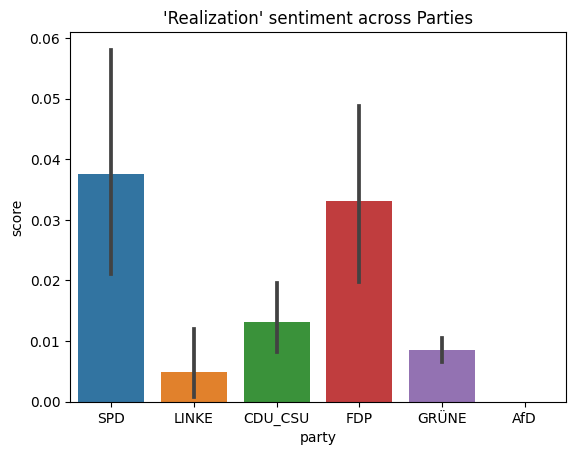

In [ ]:
sns.barplot(data=df3.query("emotion=='curiosity'"), x="party", y="score")

# Add a title to the plot
plt.title("'Curiosity' sentiment across Parties")

# Show the plot
plt.show()

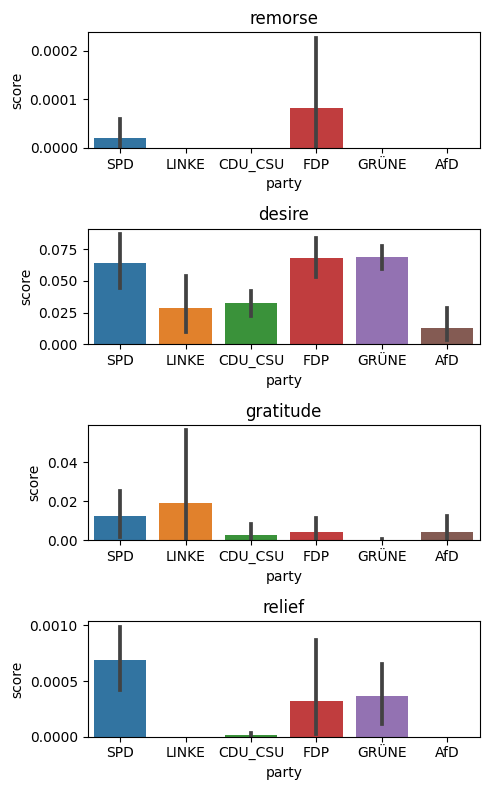

In [18]:
nrows=4
ncols=1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5,8))

for i in range(nrows*ncols):
  row = i%nrows
  ax = axs[i]
  label = all_labels[i]
  sns.barplot(data=df3.query("emotion==@label"), x="party", y="score",ax=ax)
  ax.set_title(label)

fig.tight_layout()

**We have decided to select 'love', 'caring','disgust', 'fear' in our final presentation - let"s select and also amplify the titles.**

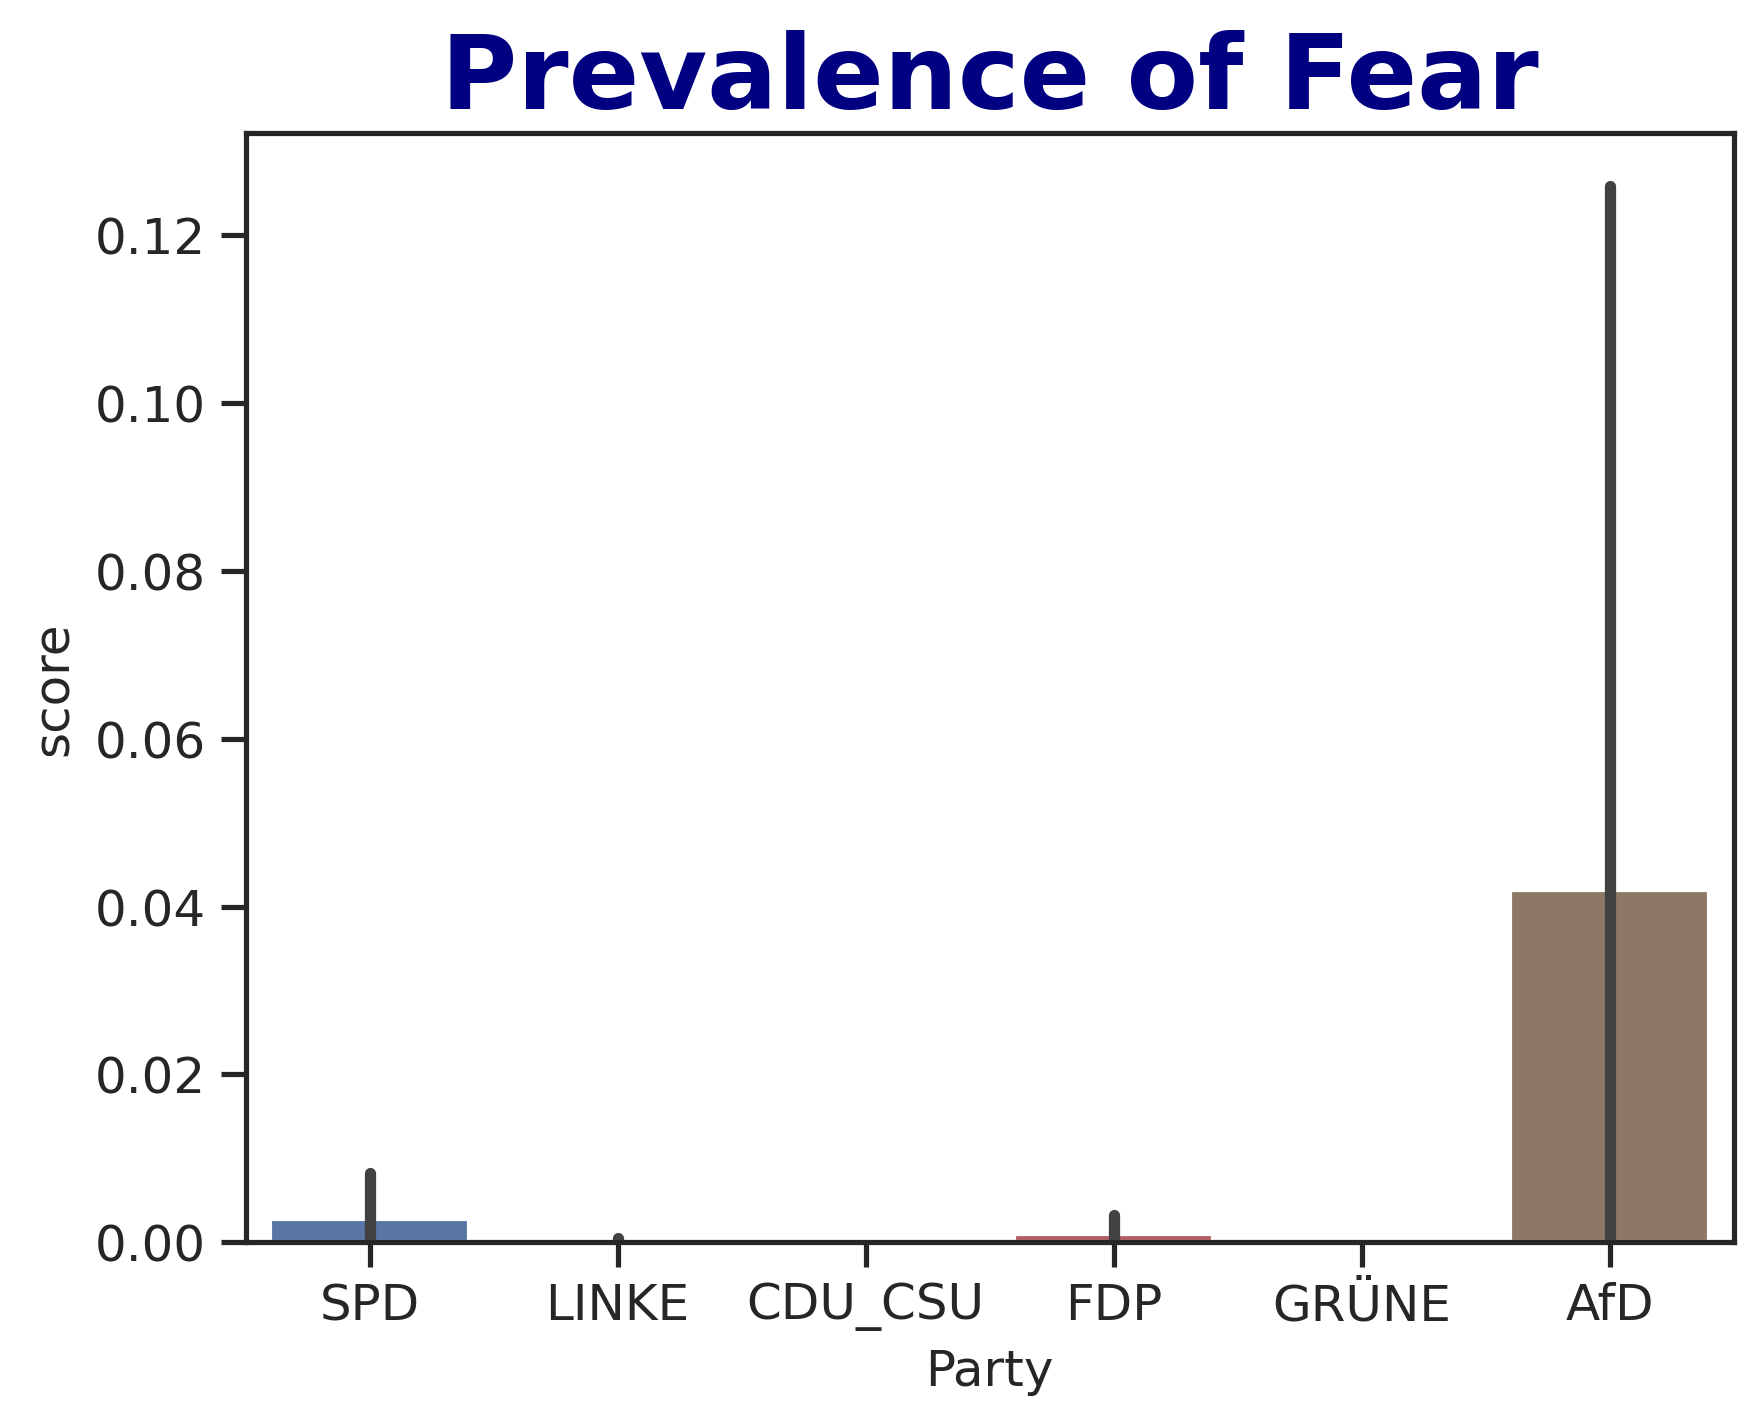

In [30]:

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

plot = sns.barplot(data=df3.query("emotion=='disgust'"), x="party", y="score")
plot.set_title('Prevalence of Disgust', fontsize=25, weight='bold', color='navy')
plot.set_xlabel('Party', fontsize=12)
plot.tick_params(labelsize=12)

fig = plot.get_figure()
fig.savefig('Chart_disgust.png')

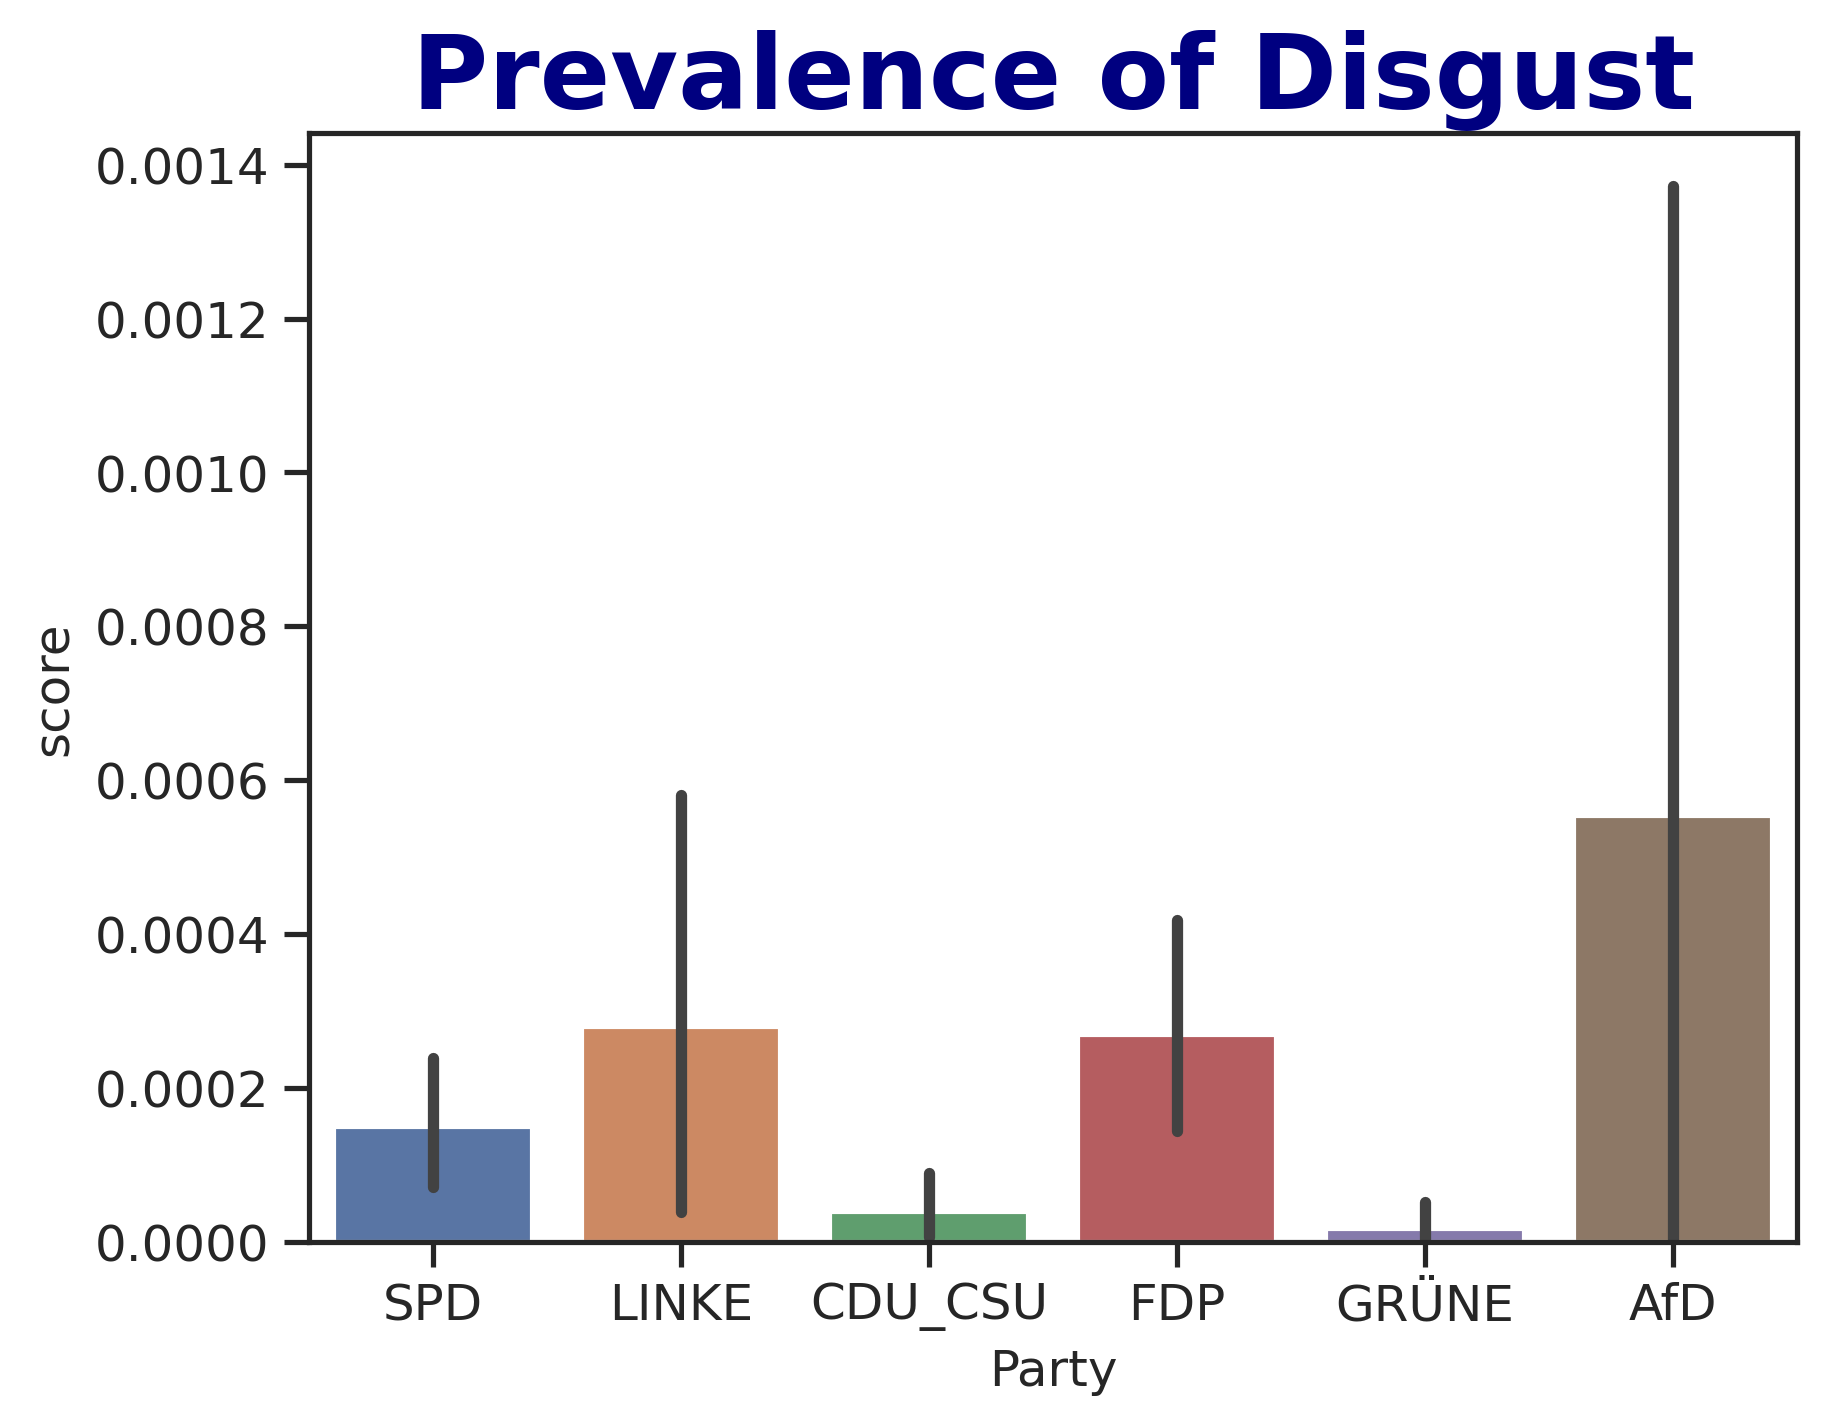

In [31]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

plot = sns.barplot(data=df3.query("emotion=='disgust'"), x="party", y="score")
plot.set_title('Prevalence of Disgust', fontsize=25, weight='bold', color='navy')
plot.set_xlabel('Party', fontsize=12)
plot.tick_params(labelsize=12)

fig = plot.get_figure()
fig.savefig('Chart_disgust.png')

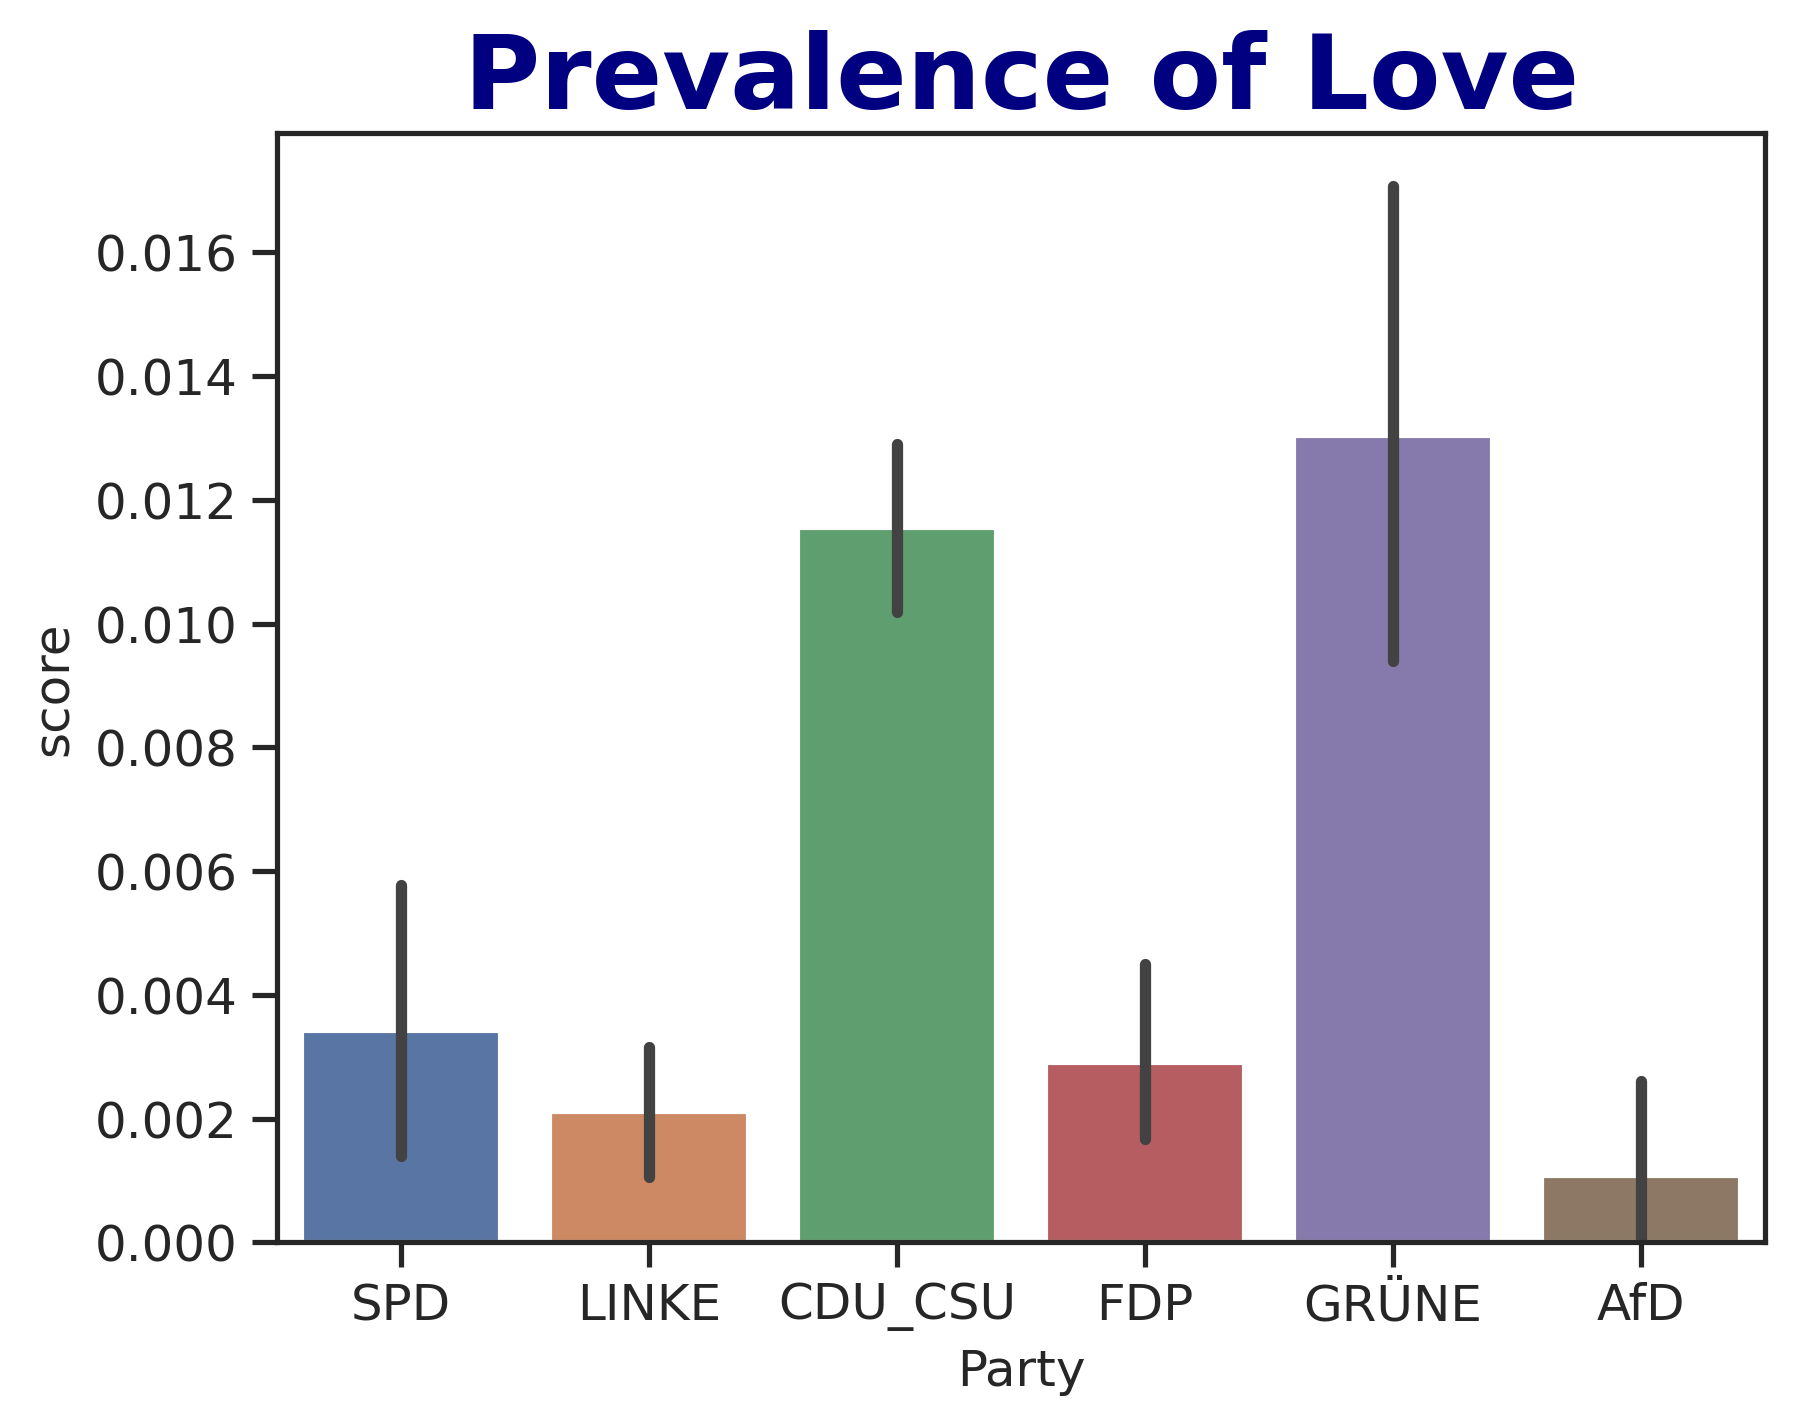

In [32]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

plot = sns.barplot(data=df3.query("emotion=='love'"), x="party", y="score")
plot.set_title('Prevalence of Love', fontsize=25, weight='bold', color='navy')
plot.set_xlabel('Party', fontsize=12)
plot.tick_params(labelsize=12)

fig = plot.get_figure()
fig.savefig('Chart_love.png')

# **Plotting**

In [ ]:
# one chart for each emotions - too big
#

In [ ]:
# Step 2: Create new 'label' and 'score' columns
df_exploded[['label', 'score']] = pd.json_normalize(df_exploded['top_10_sentiments'])

In [ ]:

# Step 3: Merge new columns with the original DataFrame and drop 'top_10_sentiments'
df_result = pd.merge(df_distinct.drop(columns='top_10_sentiments'), df_exploded[['label', 'score']], on='index')

# Display the result
print(df_result)

In [ ]:

# Assuming 'top_10_sentiment' column contains the list of dictionaries
df_percent_row1 = pd.DataFrame({
    'top_10_sentiments': [
        [{'label': 'neutral', 'score': 0.76}, {'label': 'approval', 'score': 0.23}, ...],
        [{'label': 'optimism', 'score': 0.85}, {'label': 'disapproval', 'score': 0.12}, ...],
        # ... other rows
    ]
})



In [ ]:
df_labels_scores = pd.DataFrame(df_percent['top_10_sentiments'].explode().tolist())

# Step 2: Visualize Data
plt.figure(figsize=(10, 6))
plt.bar(df_labels_scores['label'], df_labels_scores['score'])
plt.xlabel('Sentiment Label')
plt.ylabel('Score')
plt.title('Sentiment Scores')
plt.xticks(rotation=45, ha='right')
plt.show()

heatmap representation

In [ ]:
# Example data
sentiment_labels = df_exploded['label']
matching_scores = df_exploded['score']

# Create a DataFrame from the lists
data = {'Sentiment Label': sentiment_labels, 'Matching Score': matching_scores}
df_heatmap = pd.DataFrame(data)

# Check for missing or NaN values
print(df_heatmap.isnull().sum())

# Check unique values
print(df_heatmap.nunique())

# Use pivot_table to handle potential duplicate entries
heatmap_data = df_heatmap.pivot_table(index='Sentiment Label', columns='Matching Score', values='Matching Score', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Sentiment Labels and Matching Scores Heatmap')
plt.show()

# **Method 2 - Function .literal_eval()**